The goal of this analysis is to determine if there is a correlation between genre tags and user suggestions.

This analysis does not limit the number of tags in the dataset.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, MultiLabelBinarizer

In [32]:
df_test = pd.read_csv("../Data/test_gr/test.csv")
df_train = pd.read_csv("../Data/train_gr/train.csv")
df_overview = pd.read_csv("../Data/train_gr/game_overview.csv")

In [85]:
df_train[df_train["user_suggestion"] == 0]

review_id                        title    year  \
8              9  Spooky's Jump Scare Mansion  2015.0   
91            92  Spooky's Jump Scare Mansion  2015.0   
93            94  Spooky's Jump Scare Mansion  2015.0   
99           100  Spooky's Jump Scare Mansion  2015.0   
100          101  Spooky's Jump Scare Mansion  2015.0   
...          ...                          ...     ...   
17421      25467            School of Dragons  2018.0   
17422      25468            School of Dragons  2018.0   
17423      25469            School of Dragons  2018.0   
17425      25471                 EverQuest II  2014.0   
17488      25534                 EverQuest II  2017.0   

                                             user_review  user_suggestion  
8      Somewhere between light hearted, happy parody ...                0  
91     Has a few nice elements but overall quite bori...                0  
93     boring. jump scares have 0 effect on me. if yo...                0  
99     What the hell is this rubbish? There's nothing...                0  
100    It's not a bad game, it's just waaaay too slow...                0  
...                                                  ...              ...  
17421  Product received for freeI think we can all ag...                0  
17422  Im really dissapointed of the Game on steam! i...                0  
17423  The only fun thing about this game is the flyi...                0  
17425  its okay, but not great, thats just it. It has...                0  
17488  this was the first MMORPG i've ever played but...                0  

[7526 rows x 5 columns]

In [33]:
#group training data by title and aggregate the mean of the user_suggestion
d = df_train.groupby([df_train["title"]], as_index=False).agg({"user_suggestion": "mean"}).sort_values(by="user_suggestion", ascending=False)

In [34]:
#join the training and overview data into an array
df_join = [d, df_overview]
#convert array into data frame
df_join = pd.concat(df_join)

#group by title and ensure that other relevant columns are preserved. Everything else is dropped
df_join = df_join.groupby(["title"]).agg({"user_suggestion": "mean", "tags": "first"}).reset_index().sort_values(by="user_suggestion", ascending=False)
df_join.head()

title  user_suggestion  \
20     EverQuest II         0.971014   
23  Fractured Space         0.958217   
34    Path of Exile         0.906114   
9       Creativerse         0.900407   
35     PlanetSide 2         0.896186   

                                                 tags  
20  ['Free to Play', 'Massively Multiplayer', 'RPG...  
23  ['Space', 'Multiplayer', 'Free to Play', 'PvP'...  
34  ['Free to Play', 'Action RPG', 'Hack and Slash...  
9   ['Free to Play', 'Survival', 'Open World', 'Mu...  
35  ['Free to Play', 'Massively Multiplayer', 'FPS...

In [35]:
#get games with nan user_suggestion values
df_nan = df_join[~(df_join["user_suggestion"] <= 1)]
df_nan_encoded = df_join[~(df_join["user_suggestion"] <= 1)]

#copy dataframe without encoded titles
df_final = df_join.copy(deep=True)
#copy dataframe with encoded titles (eventually)
df_encoded = df_join.copy(deep=True)

#drop nan values from copied dataframes
df_final = df_final.dropna()
df_encoded = df_encoded.dropna()

In [36]:
#encode titles to numeric values in df_encoded
le = LabelEncoder()
oe = OrdinalEncoder().set_output(transform="pandas")
df_encoded["title"] = le.fit_transform(df_encoded["title"])
df_nan_encoded["title"] = le.fit_transform(df_nan_encoded["title"])
df_encoded.head()

C:\Users\dylan\AppData\Local\Temp\ipykernel_14784\2187266266.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan_encoded["title"] = le.fit_transform(df_nan_encoded["title"])


title  user_suggestion                                               tags
20     14         0.971014  ['Free to Play', 'Massively Multiplayer', 'RPG...
23     16         0.958217  ['Space', 'Multiplayer', 'Free to Play', 'PvP'...
34     21         0.906114  ['Free to Play', 'Action RPG', 'Hack and Slash...
9       6         0.900407  ['Free to Play', 'Survival', 'Open World', 'Mu...
35     22         0.896186  ['Free to Play', 'Massively Multiplayer', 'FPS...

In [37]:
#make a dataframe with the tags as one big string
final_str = df_final.copy(deep=True)
encoded_str = df_encoded.copy(deep=True)

for i, row in df_final["tags"].items():
    df = row.replace("[", "").replace("]", "").replace("'", "")
    df = df.split(", ")
    
    #make tags an array of strings
    df_final["tags"][i] = df
    df_encoded["tags"][i] = df

    #make tags one big string
    final_str["tags"][i] = ' '.join(df)
    encoded_str["tags"][i] = ' '.join(df)


C:\Users\dylan\AppData\Local\Temp\ipykernel_14784\3700805078.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded["tags"][i] = df
C:\Users\dylan\AppData\Local\Temp\ipykernel_14784\3700805078.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_str["tags"][i] = ' '.join(df)
C:\Users\dylan\AppData\Local\Temp\ipykernel_14784\3700805078.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_str["tags"][i] = ' '.join(

C:\Users\dylan\AppData\Local\Temp\ipykernel_14784\3700805078.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_str["tags"][i] = ' '.join(df)
C:\Users\dylan\AppData\Local\Temp\ipykernel_14784\3700805078.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_str["tags"][i] = ' '.join(df)
C:\Users\dylan\AppData\Local\Temp\ipykernel_14784\3700805078.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["tags"][i] = d

In [80]:
sample = encoded_str[encoded_str["tags"].str.contains("Stealth", case=False)]
sample.count()

title              1
user_suggestion    1
tags               1
dtype: int64

In [38]:
genre = []
#iterate through tags column and concat into a single dataframe
for i, row in df_encoded["tags"].items():
    for x in row:
        genre.append(x)
df_genre = pd.DataFrame(data={"genre": genre})
df_genre

genre
0           Free to Play
1  Massively Multiplayer
2                    RPG
3                 MMORPG
4                Fantasy

In [39]:
df_genre["titles"] = 0
df_genre["user_suggestions"] = 0

#match each genre with a list of titles/user_suggestions that has that tag
for i, row in df_genre.iterrows():
    for x, r in df_encoded.iterrows():
        if row["genre"] in r["tags"]:
            df_genre["titles"][i] += 1
            df_genre["user_suggestions"][i] += df_encoded["user_suggestion"][x]
df_genre.head()

C:\Users\dylan\AppData\Local\Temp\ipykernel_14784\3359241191.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre["titles"][i] += 1
C:\Users\dylan\AppData\Local\Temp\ipykernel_14784\3359241191.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre["user_suggestions"][i] += df_encoded["user_suggestion"][x]
C:\Users\dylan\AppData\Local\Temp\ipykernel_14784\3359241191.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.9710144927536232' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_genre["u

genre  titles  user_suggestions
0           Free to Play      44         27.369660
1  Massively Multiplayer      33         19.712478
2                    RPG      22         14.072984
3                 MMORPG      10          6.345574
4                Fantasy      13          8.415556

In [40]:
#get the mean of the user_suggestions
for x, row in df_genre.iterrows():
    df_genre["user_suggestions"][x] = df_genre["user_suggestions"][x] / df_genre["titles"][x]
df_genre = df_genre.drop_duplicates()

In [41]:
df_genre

genre  titles  user_suggestions
0             Free to Play      44          0.622038
1    Massively Multiplayer      33          0.597348
2                      RPG      22          0.639681
3                   MMORPG      10          0.634557
4                  Fantasy      13          0.647350
..                     ...     ...               ...
603                 Racing       1          0.466346
607                Driving       1          0.466346
643                Hunting       1          0.444015
658                Stealth       1          0.444015
677                    Mod       1          0.412017

[140 rows x 3 columns]

In [42]:
df_genre["genre"] = le.fit_transform(df_genre["genre"])

In [43]:
x = df_genre["genre"]
y = df_genre["user_suggestions"]

In [61]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

In [62]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(x_train.to_numpy().reshape(-1, 1),y_train)

LinearRegression()

In [63]:
print('Coefficients:', lin_reg.coef_)
print('Intercept', lin_reg.intercept_)

Coefficients: [-0.00035851]
Intercept 0.6926993234098164


In [64]:
y_pred = lin_reg.predict(x_test.to_numpy().reshape(-1, 1))
y_pred

array([0.64824371, 0.64430006, 0.68445352, 0.66401828, 0.68086839,
       0.66258423, 0.6536214 , 0.65111181, 0.65039478, 0.68122691,
       0.68266096, 0.65541397, 0.68481204, 0.68194393, 0.64394155,
       0.65720653, 0.66652787, 0.66007464, 0.65935761, 0.65756504,
       0.66222571, 0.69054825, 0.66760341, 0.6589991 , 0.67262259,
       0.66330125, 0.67369813, 0.68588758, 0.66688638, 0.67047151,
       0.65290438, 0.66545233, 0.67513218, 0.6866046 , 0.64716817,
       0.6754907 , 0.64322452, 0.68768014, 0.67871731, 0.68050988,
       0.68947271, 0.68409501])

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE: %.2f" % mean_squared_error(y_test, y_pred))

MSE: 0.02


In [66]:
print("R2 Score (Coefficient of Determination): %.2f" % r2_score(y_test, y_pred))

R2 Score (Coefficient of Determination): -0.11


In [67]:
y_pred

array([0.64824371, 0.64430006, 0.68445352, 0.66401828, 0.68086839,
       0.66258423, 0.6536214 , 0.65111181, 0.65039478, 0.68122691,
       0.68266096, 0.65541397, 0.68481204, 0.68194393, 0.64394155,
       0.65720653, 0.66652787, 0.66007464, 0.65935761, 0.65756504,
       0.66222571, 0.69054825, 0.66760341, 0.6589991 , 0.67262259,
       0.66330125, 0.67369813, 0.68588758, 0.66688638, 0.67047151,
       0.65290438, 0.66545233, 0.67513218, 0.6866046 , 0.64716817,
       0.6754907 , 0.64322452, 0.68768014, 0.67871731, 0.68050988,
       0.68947271, 0.68409501])

<Axes: xlabel='genre', ylabel='user_suggestions'>

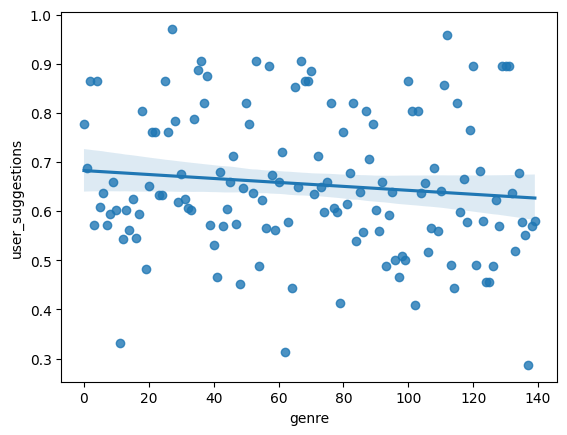

In [68]:
sns.regplot(data=df_genre, y='user_suggestions',x="genre")

Linear Regression: 0 to predict user suggestion averages
R2 Score (Coefficient of Determination): 0.03
MSE: 0.02
--------------------------------------------------------------------------------
Linear Regression: 1 to predict user suggestion averages
R2 Score (Coefficient of Determination): -0.06
MSE: 0.03
--------------------------------------------------------------------------------
Linear Regression: 2 to predict user suggestion averages
R2 Score (Coefficient of Determination): -0.10
MSE: 0.02
--------------------------------------------------------------------------------
Linear Regression: 3 to predict user suggestion averages
R2 Score (Coefficient of Determination): 0.02
MSE: 0.02
--------------------------------------------------------------------------------
Linear Regression: 4 to predict user suggestion averages
R2 Score (Coefficient of Determination): -0.16
MSE: 0.02
--------------------------------------------------------------------------------


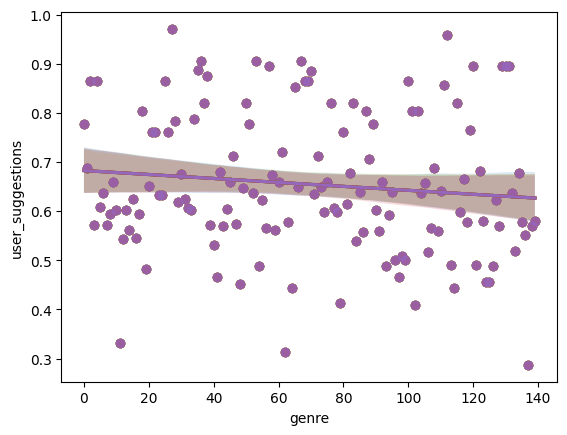

In [69]:
for f in range(0, 5):
    x = df_genre["genre"]
    y = df_genre["user_suggestions"]

    # Train-Test Split
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

    # Create and fit the Linear Regression Model.
    lin_reg = LinearRegression()
    lin_reg.fit(x_train.to_numpy().reshape(-1, 1),y_train)

    # Predict using the 'test' values.
    y_pred = lin_reg.predict(x_test.to_numpy().reshape(-1, 1))

    print(f'Linear Regression: {f} to predict user suggestion averages')
    print("R2 Score (Coefficient of Determination): %.2f" % r2_score(y_test, y_pred))
    print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
    sns.regplot(data=df_genre, y='user_suggestions',x="genre")
    print('-'*80)


<Axes: xlabel='genre', ylabel='titles'>

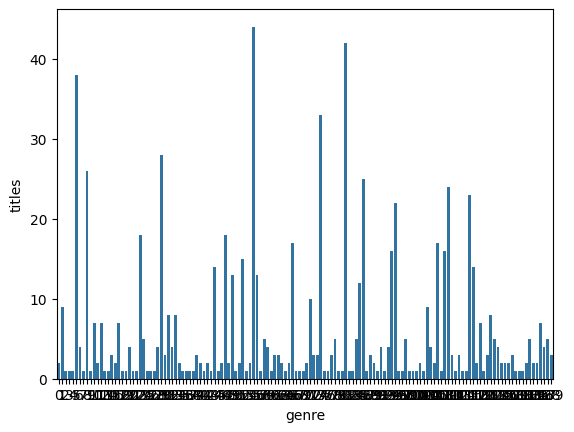

In [70]:
sns.barplot(data=df_genre, x="genre", y="titles")

In [71]:
len(df_encoded)

44

In [72]:
len(df_genre)

140